## Visual Data analysis and ML modeling on Banking Data ##

In [293]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import scipy
%matplotlib inline

In [294]:
# For unhide the all columns
pd.set_option('display.max_columns', 22)

In [295]:
#Creating the datafram from .csv file
df=pd.read_csv('bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [296]:
df.shape

(41188, 21)

In [297]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')




Input features (column names):

1.  `age` - client age in years (numeric)
2.  `job` - type of job (categorical: `admin.`, `blue-collar`, `entrepreneur`, `housemaid`, `management`, `retired`, `self-employed`, `services`, `student`, `technician`, `unemployed`, `unknown`)
3.  `marital` - marital status (categorical: `divorced`, `married`, `single`, `unknown`)
4.  `education` - client education (categorical: `basic.4y`, `basic.6y`, `basic.9y`, `high.school`, `illiterate`, `professional.course`, `university.degree`, `unknown`)
5.  `default` - has credit in default? (categorical: `no`, `yes`, `unknown`)
6.  `housing` - has housing loan? (categorical: `no`, `yes`, `unknown`)
7.  `loan` - has personal loan? (categorical: `no`, `yes`, `unknown`)
8.  `contact` - contact communication type (categorical: `cellular`, `telephone`)
9.  `month` - last contact month of the year (categorical: `jan`, `feb`, `mar`, ..., `nov`, `dec`)
10. `day_of_week` - last contact day of the week (categorical: `mon`, `tue`, `wed`, `thu`, `fri`)
11. `duration` - last contact duration, in seconds (numeric).
12. `campaign` - number of contacts performed for this client during this campaign (numeric, includes last contact)
13. `pdays` - number of days that have passed after the client was last contacted from the previous campaign (numeric; 999 means the client has not been previously contacted)
14. `previous` - number of contacts performed for this client before this campaign (numeric)
15. `poutcome` - outcome of the previous marketing campaign (categorical: `failure`, `nonexistent`, `success`)
16. `emp.var.rate` - employment variation rate, quarterly indicator (numeric)
17. `cons.price.idx` - consumer price index, monthly indicator (numeric)
18. `cons.conf.idx` - consumer confidence index, monthly indicator (numeric)
19. `euribor3m` - euribor 3 month rate, daily indicator (numeric)
20. `nr.employed` - number of employees, quarterly indicator (numeric)

Output feature (desired target):


21. `y` - has the client subscribed a term deposit? (binary: `yes`,`no`)



In [298]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [299]:
# Ignoring filterwarning 
import warnings
warnings.filterwarnings('ignore')


#### Maping the target feature ####

Target feature 'y' shows a positive behavior of a phone call during the marketing campaign.
Mark the positive outcome as '1' and negative one as '0'.

In [300]:
target={'no':0, 'yes':1}

In [301]:
df['y']=df['y'].map(target)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


All 'yes' and 'no' observations are converted into 0 and 1.

## * Utilization of different Python libraries for visual data analysis ##

#### 1. Matplotlib ####

For each feature we can build a separate histogram through '.hist' function

<AxesSubplot:>

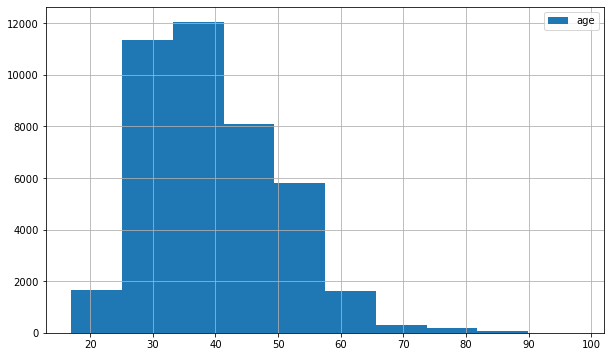

In [302]:
df['age'].hist(figsize=(10,6), bins=10, legend=True, grid=True)

The histogram shows that most of the clients are between the ages of 25 and 50, which corresponds to the actively working part of the population.

#### Building a new graph of the average client age depending upon the marital staus ####

<AxesSubplot:xlabel='marital'>

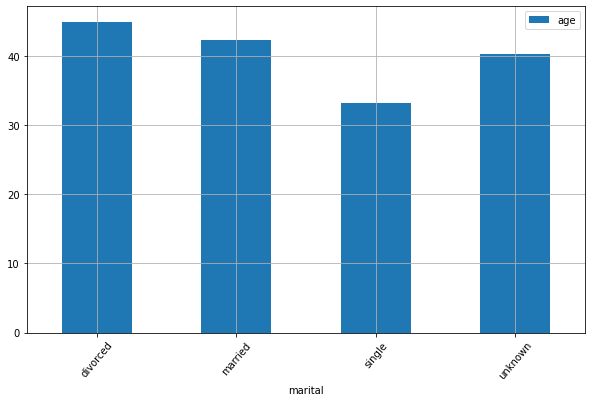

In [303]:
df[['age', 'marital']].groupby('marital').mean().plot(kind='bar', rot=50, figsize=(10,6), grid=True)

#### Seaborn ####

we will get acquainted with the first "complex" type of pair plot graphics (Scatter Plot Matrix). This visualization will help us to look at one picture as at interconnection of various features.

In [304]:
import seaborn as sns

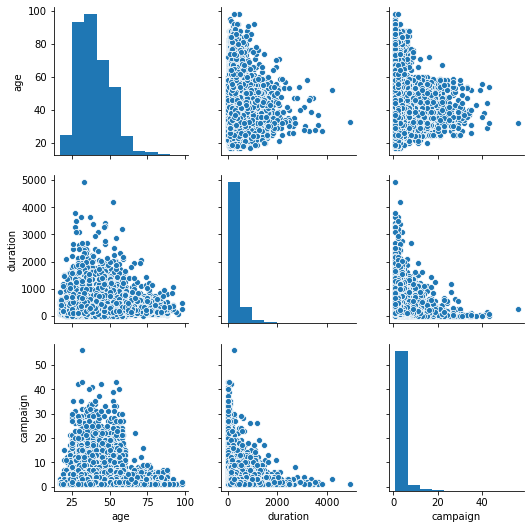

In [305]:
sns.pairplot(df[['age', 'duration', 'campaign']])

This visualization allows us to identify an interesting inverse relationship between a campaign and duration, which indicates a decrease in the duration of contact with the client with an increase in their contact quantity during the campaign.

Also with the help of seaborn we can build a distribution, for example, now see at the distribution of the client age. To do this, build distplot.

<AxesSubplot:xlabel='age'>

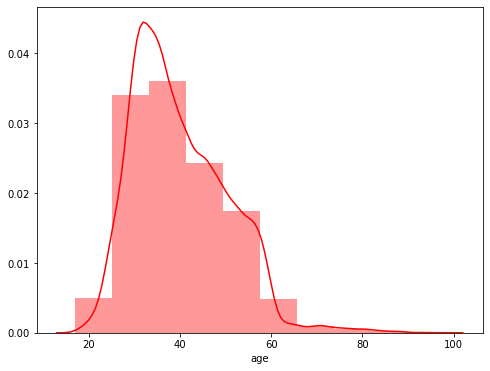

In [306]:
plt.rcParams["figure.figsize"] = (8, 6)
sns.distplot(df['age'], bins=10, color='r')

In order to look more for the relationship between two numerical features, there is also joint_plot - this is a hybrid Scatter Plot and Histogram (there are also histograms of feature distributions). Now see at the relationship between the number of contacts in a campaign and the last contact duration.

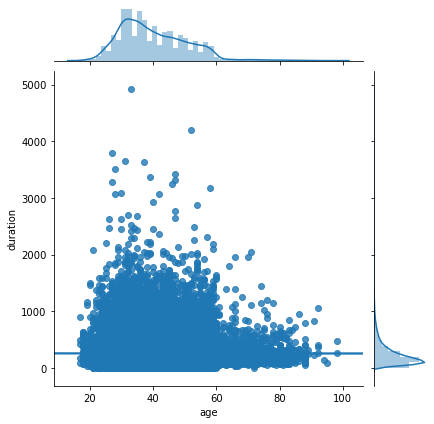

In [307]:
sns.jointplot(x='age', y='duration', data=df, kind='reg')

Another useful seaborn plot type is **Box Plot** ("Box and whisker plot"). Let's compare the age of customers for the top 5 of the most common employment forms.

In [308]:
top_5_job=df['job'].value_counts().sort_values(ascending=False).head(5).index.values
top_5_job

array(['admin.', 'blue-collar', 'technician', 'services', 'management'],
      dtype=object)

<AxesSubplot:xlabel='age', ylabel='job'>

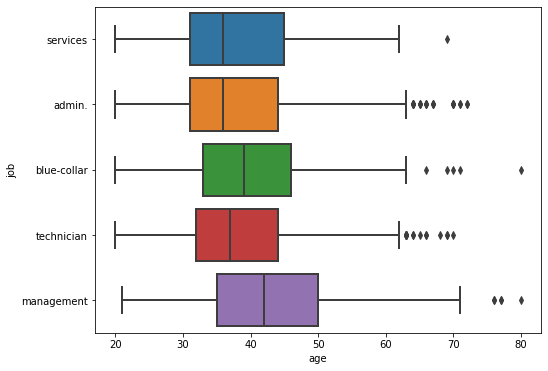

In [309]:
sns.boxplot(x='age', y='job', data=df[df['job'].isin(top_5_job)], orient='h', linewidth=2)

The plot shows that among the top-5 client categories by the type of employment, the most senior customers represent the management, and the largest number of outliers is among the categories of admin. and technician.

And one more plot type is a **heat map**. A Heat Map allows us to look at the distribution of some numerical feature in two categories. We visualize the distribution of clients on family status and the type of employment.

In [310]:
#Creating pivot table with feature and target variable
job_marital_y = (df.pivot_table(index="job", columns="marital", values="y", aggfunc=sum))
job_marital_y


marital,divorced,married,single,unknown
job,,,,
admin.,132,652,566,2
blue-collar,53,421,161,3
entrepreneur,14,88,21,1
housemaid,16,74,16,0
management,39,226,63,0
retired,92,329,12,1
self-employed,16,82,51,0
services,33,166,124,0
student,3,8,264,0


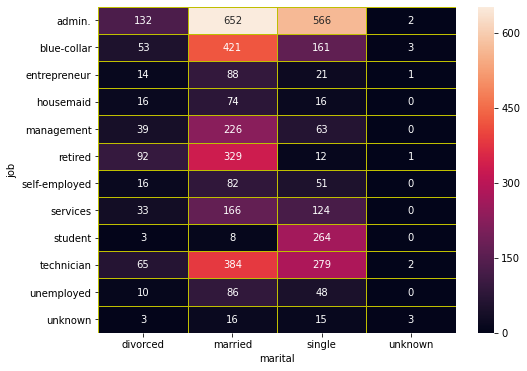

In [311]:
#Visualizing the heat map through pivot table
sns.heatmap(job_marital_y, annot=True, fmt="d", linewidths=0.9, linecolor='y');

We will visualize the distribution of clients on contact status and the type of employment.

In [312]:
job_contact_y = (df.pivot_table(index="job", columns="contact", values="y", aggfunc=sum))
job_contact_y

contact,cellular,telephone
job,,
admin.,1159,193
blue-collar,459,179
entrepreneur,89,35
housemaid,83,23
management,274,54
retired,389,45
self-employed,129,20
services,254,69
student,244,31


<AxesSubplot:xlabel='contact', ylabel='job'>

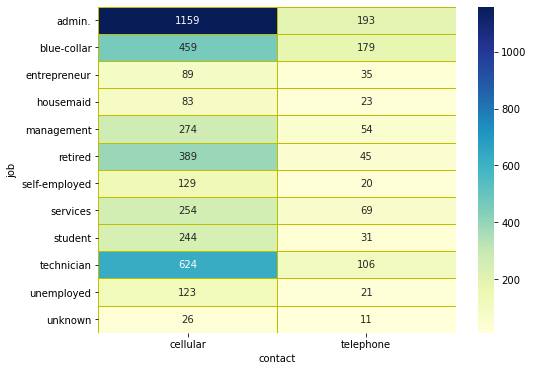

In [313]:
#Visualizing the heat map through pivot table
sns.heatmap(job_contact_y, annot=True, fmt="d", linewidths=0.9, linecolor='y', cmap="YlGnBu")

### Plotly


We looked at the visualization based on the Library **Matplotlib** and **Seaborn**. However, this is not the only option to build charts with Python. We will also get acquainted with the library **plotly**. Plotly is an open-source library that allows us to build interactive graphics in Python.

The beauty of interactive graphs is that we can see the exact numerical value on mouse hover, hide the uninteresting rows in the visualization, zoom in a certain area of ​​graphics, etc.

To begin with, we build Line Plot with the distribution of the total number and the number of attracted clients by **age**.

In [314]:
#Importing plotly libraries

import plotly
import plotly.graph_objs as gp
from plotly.offline import iplot, plot, init_notebook_mode, download_plotlyjs
init_notebook_mode(connected=True)

In [315]:
#Aggregating the 'age' feature and target 'y'
age_sum=df.groupby('age')[['y']].sum()
age_sum

,y
age,
17,2
18,12
19,20
20,23
21,29
...,...
91,0
92,3
94,0


In [316]:
age_count=(df.groupby('age')[['y']].count())
age_count

,y
age,
17,5
18,28
19,42
20,65
21,102
...,...
91,2
92,4
94,1


In [317]:
#Creating a dataframe by joining two aggregate object 'age_sum' and 'age_count'

age_df=(age_sum.join(age_count, rsuffix='_count'))

#Renaming the columns
age_df.columns=["Attracted", "Total Number"]
age_df

,Attracted,Total Number
age,,
17,2,5
18,12,28
19,20,42
20,23,65
21,29,102
...,...,...
91,0,2
92,3,4
94,0,1


In **Plotly**, we create the Figure object, which consists of data and design/style, for which the object Layout was created. In simple cases, we can call the function iplot just for the traces list.

In [318]:
trace_attracted=gp.Scatter(x=age_df.index, y=age_df["Attracted"], name="Attracted", fillcolor='violet') 
trace_tot_num= gp.Scatter(x=age_df.index, y=age_df["Total Number"], name= "Total Number", fillcolor='yellow')

data=[trace_attracted, trace_tot_num]
#data

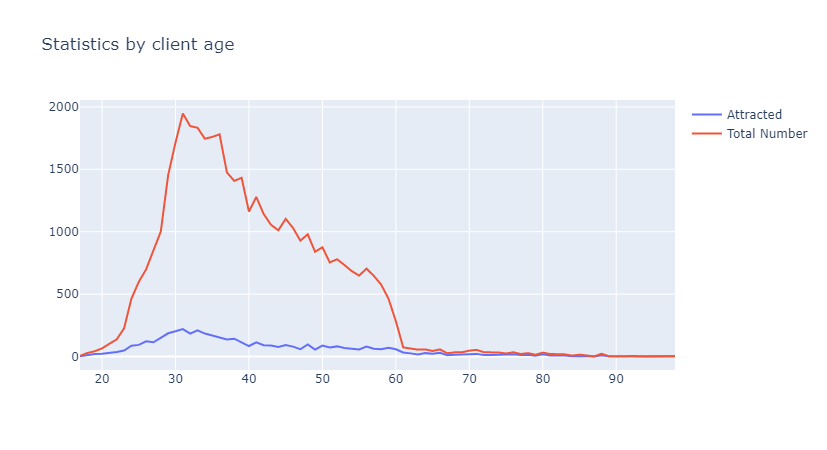

In [319]:
#Creating layout, figure and visualize the data
layout={'title': 'Statistics by client age'}
fig=gp.Figure(data=data, layout=layout)

iplot(fig, show_link=False)

Let us also see the distribution of customers by months, designed by the number of attracted clients and on the total number of clients. To do this, build **Bar Chart**

In [320]:
# Creating aggregate object on month data
month_index=["jan", "feb", "mar", "apr", "may", "jun", "jul", "aug", "sep", "oct", "nov", "dec"]

month_sum=df.groupby('month')[['y']].sum()
month_sum

,y
month,
apr,539
aug,655
dec,89
jul,649
jun,559
mar,276
may,886
nov,416
oct,315


In [321]:
month_count=df.groupby('month')[['y']].count()
month_count

,y
month,
apr,2632
aug,6178
dec,182
jul,7174
jun,5318
mar,546
may,13769
nov,4101
oct,718


In [322]:
#Creating month dataframe by joining these aggregated object

month_df=(month_sum.join(month_count, rsuffix='_count')).reindex(month_index)

month_df.columns=['Attracted', 'Total Number']
month_df
          

,Attracted,Total Number
month,,
jan,NaN,NaN
feb,NaN,NaN
mar,276.0,546.0
apr,539.0,2632.0
may,886.0,13769.0
jun,559.0,5318.0
jul,649.0,7174.0
aug,655.0,6178.0
sep,256.0,570.0


In [323]:
trace_mo_att=gp.Bar(x=month_df.index, y=month_df['Attracted'], name='Attracted')
trace_mo_tot=gp.Bar(x=month_df.index, y=month_df['Total Number'], name='Total Number')
data_month=[trace_mo_att, trace_mo_tot]

data_month

[Bar({
     'name': 'Attracted',
     'x': array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
                 'nov', 'dec'], dtype=object),
     'y': array([ nan,  nan, 276., 539., 886., 559., 649., 655., 256., 315., 416.,  89.])
 }),
 Bar({
     'name': 'Total Number',
     'x': array(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
                 'nov', 'dec'], dtype=object),
     'y': array([   nan,    nan,   546.,  2632., 13769.,  5318.,  7174.,  6178.,   570.,
                   718.,  4101.,   182.])
 })]

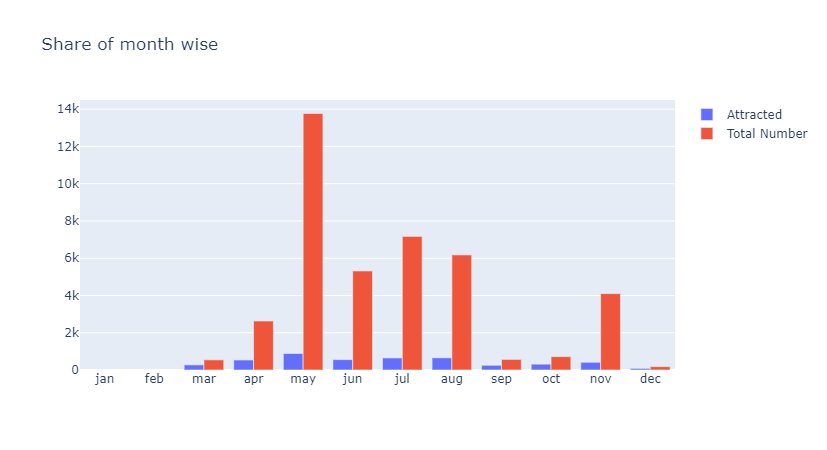

In [324]:
layout={'title': "Share of month wise"}
        
fig=gp.Figure(data=data_month, layout=layout)

iplot(fig, show_link=True)

**Plotly** can build the Box plot. Considering the differences in the client age depending on the family status

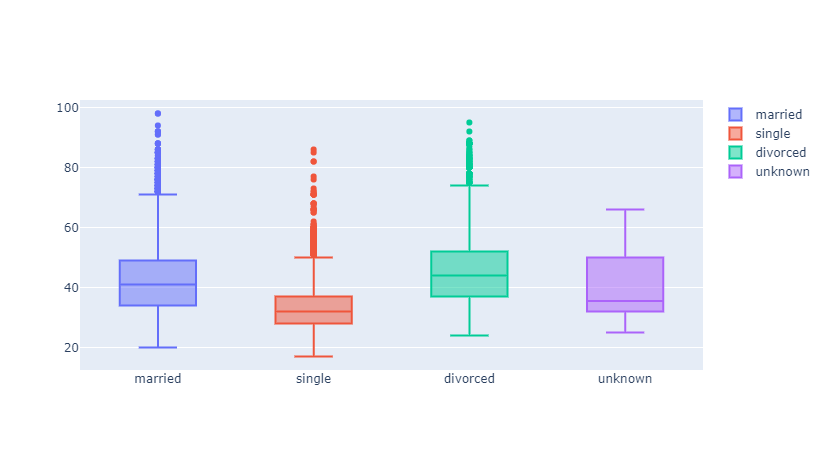

In [325]:
# Creating box plot with age and marital status category

data_status=[]

for status in df['marital'].unique():
    data_status.append(gp.Box(y=df[df.marital == status].age, name=status))
    
iplot(data_status, show_link=False)   

## Multi-collinearity analysis ##

When a dataset has a large number of independent variables (features), it is possible that few of these independent variables may be highly correlated. The exixtance of a high correlation between independent variables called **Multi-collinearity**. Presence of multi-collinearity can destabilize the model. Thus, it is necessary to identify the presense of multi-collinearity and take corrective actions.

In [326]:
# Creating feature metrix with numerical features
X_ind=df[["age", "duration", "campaign","pdays","previous","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"]]
X_ind.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [327]:
X_features=X_ind.columns
X_features

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

###  Variance Inflation Factor ###

Variance inflation factor is a measure used for identifying the existance of multi-collinearity.

The plot clearly shows the distribution of clients by age, the presence of outliers for all categories of the family status, except for unknown. Moreover, the plot is interactive - hovering the mouse pointer to its elements allows us to obtain additional statistical characteristics of the series.

 $$ VIF = 1 / (1 - R^2) $$

<li> R = R-Squared value

In [328]:
#Importing VIF library

from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy
from scipy import stats

In [329]:
def get_vif(X_ind):
    X_matrix=X_ind.values
    vif=[variance_inflation_factor(X_matrix, i) for i in range (X_matrix.shape[1])]
    vif_factors=pd.DataFrame()
    vif_factors['column']=X_ind.columns
    vif_factors['VIF']=vif
    
    return vif_factors

In [330]:
vif_factors=get_vif(X_ind[X_features])
vif_factors

,column,VIF
0,age,16.047296
1,duration,2.011044
2,campaign,1.921499
3,pdays,44.413175
4,previous,2.001464
5,emp.var.rate,28.910219
6,cons.price.idx,22561.123124
7,cons.conf.idx,120.086975
8,euribor3m,226.237349
9,nr.employed,26746.634212


In [331]:

selected_vif_feat=vif_factors[vif_factors.VIF > 4].column
selected_vif_feat

0               age
3             pdays
5      emp.var.rate
6    cons.price.idx
7     cons.conf.idx
8         euribor3m
9       nr.employed
Name: column, dtype: object

Text(0.5, 1.0, 'Heatmap depicting correlation between features')

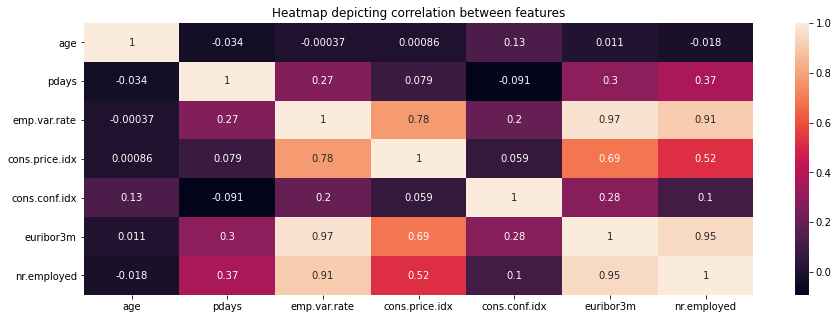

In [332]:
plt.figure(figsize=(15,5))
sns.heatmap(X_ind[selected_vif_feat].corr(), annot=True)
plt.title('Heatmap depicting correlation between features')

From above heat map '	emp.var.rate' and 'euribor3m', 'nr.employed' highly correlated. We can keep one feature and eleminate other from each category. Here we will remove 'emp.var.rate' feature from the feature matrix.

In [333]:

removed_columns=['emp.var.rate']

X_new_feature= list(set(X_features) - set(removed_columns))
X_new_feature

['euribor3m',
 'campaign',
 'age',
 'pdays',
 'cons.price.idx',
 'cons.conf.idx',
 'nr.employed',
 'duration',
 'previous']

In [334]:
# Creating new feature matrix removing one column
X=X_ind[X_new_feature]
X

,euribor3m,campaign,age,pdays,cons.price.idx,cons.conf.idx,nr.employed,duration,previous
0,4.857,1,56,999,93.994,-36.4,5191.0,261,0
1,4.857,1,57,999,93.994,-36.4,5191.0,149,0
2,4.857,1,37,999,93.994,-36.4,5191.0,226,0
3,4.857,1,40,999,93.994,-36.4,5191.0,151,0
4,4.857,1,56,999,93.994,-36.4,5191.0,307,0
...,...,...,...,...,...,...,...,...,...
41183,1.028,1,73,999,94.767,-50.8,4963.6,334,0
41184,1.028,1,46,999,94.767,-50.8,4963.6,383,0
41185,1.028,2,56,999,94.767,-50.8,4963.6,189,0
41186,1.028,1,44,999,94.767,-50.8,4963.6,442,0


From the dataset we can see it is a classification problem, We will use different types of classification techniques like; Logistics Regression, Decision Tree, Random Forest, KNN, SVM for understanding the classes of term deposit.

### Logistic Regression ###

Logistic regression ia a statistical model in which the response variable takes a discrete value and the explanatory variables can either be continous or discrete. If the outcome variable takes only two values, then the model is called binary logistic regression model. Here we are working on binary logistic regression where the outcome either '0' or '1'. 

For classification algorithm we have to choose the feature which has numerical data. Creating new dataframe with numerical feature.

In [335]:
# Creating feature metrix

X.head()

,euribor3m,campaign,age,pdays,cons.price.idx,cons.conf.idx,nr.employed,duration,previous
0,4.857,1,56,999,93.994,-36.4,5191.0,261,0
1,4.857,1,57,999,93.994,-36.4,5191.0,149,0
2,4.857,1,37,999,93.994,-36.4,5191.0,226,0
3,4.857,1,40,999,93.994,-36.4,5191.0,151,0
4,4.857,1,56,999,93.994,-36.4,5191.0,307,0


In [336]:
X.shape

(41188, 9)

In [337]:
#Creating response vector

Y=df["y"]
Y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [338]:
#Importing Sci-kit learn libraries

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn import metrics
from sklearn import preprocessing

In [339]:
#Normalisation of feature matrics through standard scaler

X=preprocessing.StandardScaler().fit_transform(X)
X

array([[ 0.71245988, -0.56592197,  1.53303429, ...,  0.33167991,
         0.01047142, -0.34949428],
       [ 0.71245988, -0.56592197,  1.62899323, ...,  0.33167991,
        -0.42150051, -0.34949428],
       [ 0.71245988, -0.56592197, -0.29018564, ...,  0.33167991,
        -0.12451981, -0.34949428],
       ...,
       [-1.49518647, -0.20490853,  1.53303429, ..., -2.8156966 ,
        -0.26722482, -0.34949428],
       [-1.49518647, -0.56592197,  0.38152696, ..., -2.8156966 ,
         0.70856893, -0.34949428],
       [-1.49518647,  0.15610492,  3.26029527, ..., -2.8156966 ,
        -0.07438021,  1.67113606]])

In [340]:
#Splitting the dataset into train and test category

x_train, x_test, y_train, y_test=train_test_split(X,Y, test_size=0.30, random_state= 50)

In [341]:
print("Train feature Shape: ", x_train.shape)
print("Test feature Shape: ", x_test.shape)
print("Train target Shape: ",y_train.shape)
print("Test target Shape: ", y_test.shape)

Train feature Shape:  (28831, 9)
Test feature Shape:  (12357, 9)
Train target Shape:  (28831,)
Test target Shape:  (12357,)


In [342]:
# Creating regression model with logistic regression
logistic_model=LogisticRegression()
logistic_model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [343]:
# Probability of response model prediction
y_prob=logistic_model.predict(x_test)
y_prob

array([0, 0, 0, ..., 0, 0, 0])

In [344]:
# Model Score
print("Model Accuracy: ",logistic_model.score(x_test, y_test))

Model Accuracy:  0.9068544145019017


From the above accuracy score we can say our model is more than **90%** accurate.

In [345]:
print("Mean Squared Error:",mean_squared_error(y_test, y_prob))

Mean Squared Error: 0.09314558549809825


In [346]:
from math import sqrt
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_prob)))

RMSE:  0.3051976171238862


The **RMSE** value indicates the model prediction has a standard deviation of 0.30.

In [347]:
print("R-Squared value: ", r2_score(y_test, y_prob))

R-Squared value:  0.06874583738518547


In [348]:
print("R-Squared value for train data:  ", r2_score( y_train, logistic_model.predict(x_train)))

R-Squared value for train data:   0.10318785628452332


In [349]:
# Creating Confusion matrix
print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_prob))

Confusion Matrix: 
 [[10671   293]
 [  858   535]]


In [350]:
# Creating classification report on Logistic Regression model
from sklearn.metrics import classification_report
print("Classification Report: \n", metrics.classification_report( y_test, y_prob))

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10964
           1       0.65      0.38      0.48      1393

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.79      0.68      0.72     12357
weighted avg       0.89      0.91      0.90     12357



## K-Nearest Neighbor ##

**K-Nearest Neighbor** algorithm is a non-parametric, lazy learning algorithm used for regression and classification problem. Parametric models estimate a fixed number of parameters from the data and strong assumption of the data.

In [351]:
# Importing KNN library
from sklearn.neighbors import KNeighborsClassifier

In [352]:
# Building KNN model and fit with train data
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [353]:
y_pred_knn=knn_model.predict(x_test)
y_pred_knn

array([0, 0, 0, ..., 0, 0, 0])

In [354]:
print('Model Accuracy: ', knn_model.score(x_test, y_test))

Model Accuracy:  0.9035364570688679


In [355]:
print('KNN Accuracy Score: ', metrics.accuracy_score(y_test, y_pred_knn))

KNN Accuracy Score:  0.9035364570688679


KNN Model accuracy is 90%.

**Best k-value for maximum model accuracy**

In [356]:
k_range=(1,50)
score=[]

for k in k_range:
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)
    knn_pred=knn_model.predict(x_test)
    score.append(metrics.accuracy_score(y_test, knn_pred))


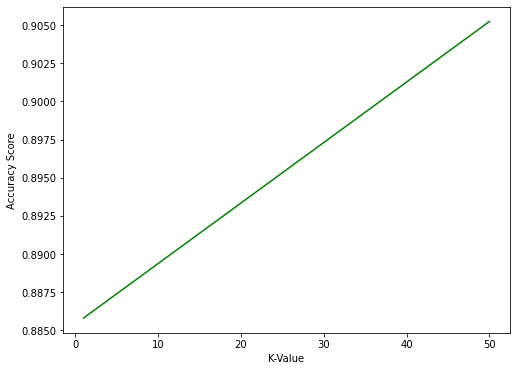

In [357]:
plt.plot(k_range, score, color='g')
plt.xlabel('K-Value')
plt.ylabel('Accuracy Score')

plt.tight_layout
plt.show()

This plot shows with the increase of K -Value model accuracy is increasisng and reached at maximum acuuracy 90.5%.

### Support Vector Machine ###

Support vactor machine is another kind od machine learning algorithm.SVM widely used for classification and regression problem in supervised learning. The objective of the support vector machine algorithm is to find a hyperplane in an N-dimensional space(N — the number of features) that distinctly classifies the data points.

In [358]:
# Importing SVM library

from sklearn.svm import SVC

In [359]:
svm_model=SVC(kernel='rbf', gamma=0.2, random_state=10)

In [360]:
svm_model.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=10, shrinking=True,
  tol=0.001, verbose=False)

In [361]:
svm_y_pred=svm_model.predict(x_test)
svm_y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [362]:
print("Model Accuracy: ", svm_model.score(x_test, y_test))

Model Accuracy:  0.9054786760540584


In [363]:
print('Accuracy Score: ', metrics.accuracy_score(y_test, svm_y_pred))

Accuracy Score:  0.9054786760540584


In [366]:
# Finding jaccard score and f1_score

from sklearn.metrics import jaccard_similarity_score, f1_score

In [367]:
print('Jaccard Score: ', metrics.jaccard_similarity_score(y_test, svm_y_pred))

Jaccard Score:  0.9054786760540584


In [368]:
print('F1 Score: ', metrics.f1_score(y_test, svm_y_pred))

F1 Score:  0.48906386701662297


In [369]:
print('Classification report: \n', metrics.classification_report(y_test, svm_y_pred))

Classification report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95     10964
           1       0.63      0.40      0.49      1393

   micro avg       0.91      0.91      0.91     12357
   macro avg       0.78      0.69      0.72     12357
weighted avg       0.89      0.91      0.90     12357



### Decision Tree ###

Decision tree is a collection of divide and conquer problem solving solving strategies that use tree like structure to predict the value of an outcome variable.The tree starts with the root node consisting of the complete data and thereafter uses intellience strateies to split the nodes into multiple branches.

In [370]:
# Importing library

from sklearn.tree import DecisionTreeClassifier

In [371]:
DT_model=DecisionTreeClassifier(criterion='entropy', max_depth=6, splitter='random', min_impurity_decrease=0.0)

In [372]:
DT_model.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')

In [373]:
y_pred_dt=DT_model.predict(x_test)
y_pred_dt

array([0, 0, 0, ..., 0, 0, 0])

In [374]:
print('Model Accuray: ', metrics.accuracy_score(y_test, y_pred_dt))

Model Accuray:  0.9042647891883143


In [375]:
print('Classification report: \n', metrics.classification_report(y_test, y_pred_dt))

Classification report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     10964
           1       0.65      0.33      0.44      1393

   micro avg       0.90      0.90      0.90     12357
   macro avg       0.78      0.66      0.69     12357
weighted avg       0.89      0.90      0.89     12357

